In [1]:
from glob import glob
import numpy as np
from astropy.table import QTable, vstack
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.interpolate import interp1d

plt.style.use('paper')

In [2]:
def custom_sort(arr):
    def key_func(item):
        # Extract number from string and convert to integer
        num = int(item[4:])  # 'conf' has length 4
        # Return a tuple with two items:
        # First item is a boolean indicating if number is 10 (True for 'conf10' and False otherwise)
        # Second item is the number itself
        # This will sort 'conf10' last and others based on their numbers
        return (num == 10, num)
    
    return sorted(arr, key=key_func)

In [3]:
which = 'disks'
version = '_disks_v2'
# version = '_v2'

# which_time = ''
# which_time = '_6totaltime'
which_time = '_6totaltime_flagged'
# which_time = '_60totaltime'
# which_time = '_60totaltime_flagged'

table = vstack([QTable.read(file) for file in glob(f'../data/tables{version}/table_fit_{which}{which_time}_conf*.fits')])
conf_unique = np.unique(table['conf']) 
conf_unique =  custom_sort(conf_unique)
conf_unique_ = np.unique(table['conf_']) 

min_baseline =  [8.7, 14.6, 14.6, 14.6, 14.6, 14.6, 14.6, 64.0, 110.4, 367.6, 244.0,]
mrs_size =      [66.7, 28.5, 22.6, 16.2, 11.2, 6.7, 4.11, 2.58, 1.42, 0.814, 0.496]
beam_size =     [12.5, 3.38, 2.3, 1.42, 0.918, 0.545, 0.306, 0.211, 0.096, 0.057, 0.042]
configuration = ['conf0', 'conf1', 'conf2', 'conf3', 'conf4', 'conf5', 'conf6', 'conf7', 'conf8', 'conf9', 'conf10']
mrs_conf = np.arange(0,11)

table.sort('conf')
table

conf,wide,sum_sim,sum_obs,rms_obs,max_sim,max_obs,sum_fit_sim,sum_fit_obs,errl_fit_sim,errh_fit_sim,errl_fit_obs,errh_fit_obs,sum_mask10_sim,sum_mask10_obs,sum_mask50_sim,sum_mask50_obs,conf_,wide_
,,Jy,Jy,Jy,Jy,Jy,,,,,,,Jy,Jy,Jy,Jy,,
bytes6,bytes8,float32,float32,float64,float32,float32,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,float32,float32,float32,float32,float64,float64
conf0,4.8mrs0,5.0,4.824766635894775,0.0013576468803208003,1.0,0.16254881024360657,,,,,,,5.0,4.490200996398926,5.0,2.4920783042907715,0.0,4.8
conf0,71.7mrs0,1265.0,50.825801849365234,0.3117109160496259,1.0,1.5403664112091064,,,,,,,1265.0,45.44438552856445,1265.0,147.19375610351562,0.0,71.7
conf0,67.0mrs0,1101.0,43.56167984008789,0.3622691481932322,1.0,1.4889392852783203,,,,,,,1101.0,87.25467681884766,1101.0,178.24998474121094,0.0,67.0
conf0,62.2mrs0,949.0,32.9628791809082,0.32249651611996644,1.0,1.2980135679244995,,,,,,,949.0,216.23565673828125,949.0,267.7135009765625,0.0,62.2
conf0,57.4mrs0,805.0,267.7738952636719,0.25533117901227664,1.0,1.1136789321899414,,,,,,,805.0,317.91082763671875,805.0,324.5572204589844,0.0,57.4
conf0,47.8mrs0,561.0,345.46746826171875,0.16815781831495846,1.0,1.5040757656097412,,,,,,,561.0,376.60986328125,561.0,325.7100830078125,0.0,47.8
conf0,43.0mrs0,457.0,305.48321533203125,0.14470665734252003,1.0,1.5689934492111206,,,,,,,457.0,326.9896545410156,457.0,271.3831787109375,0.0,43.0
conf0,52.6mrs0,673.0,339.2943115234375,0.19383945963918087,1.0,1.332659125328064,,,,,,,673.0,371.7908935546875,673.0,348.427490234375,0.0,52.6


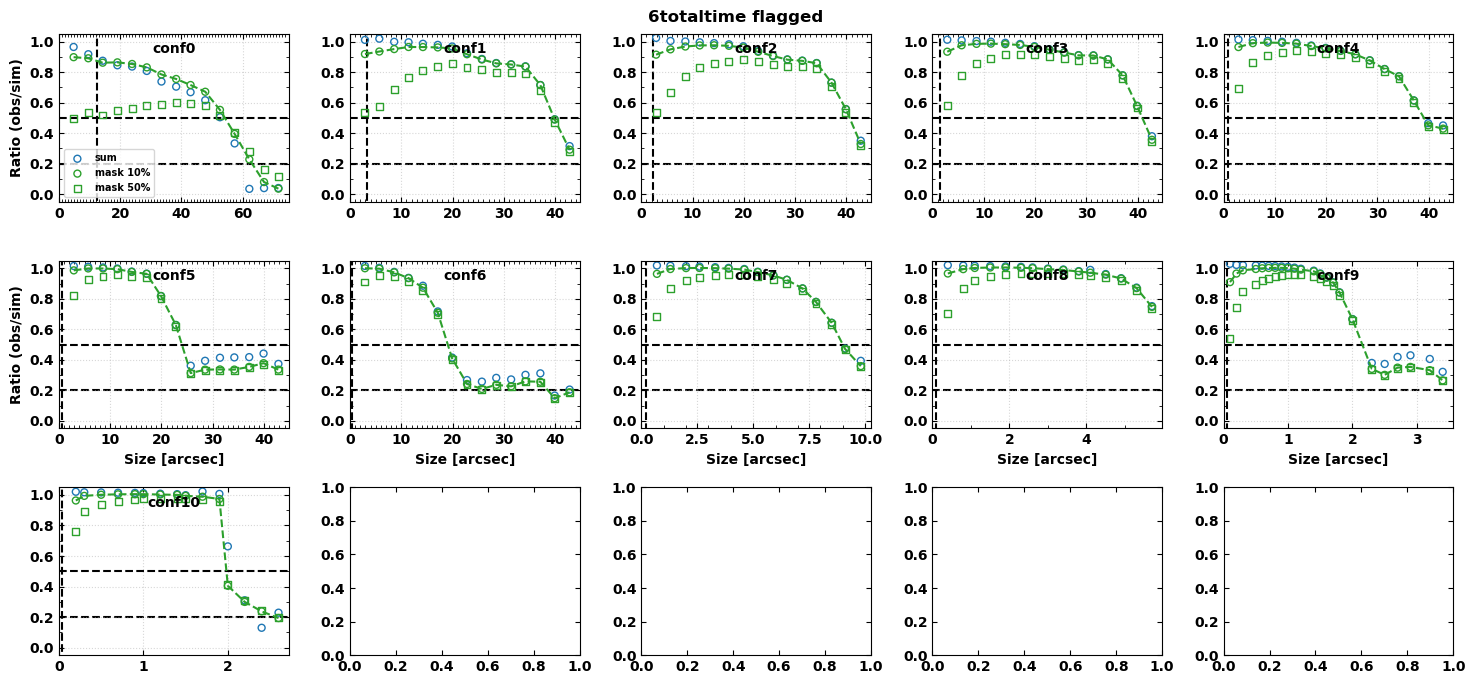

In [8]:
# Make scatter plot
fig1, ax1 = plt.subplots(3, 5, figsize=(15, 7))
ax1 = ax1.flatten()

colors = cm.turbo(np.linspace(0, 1, len(ax1)))

for i, conf in enumerate(conf_unique):

	conf_tab = table[np.where(table['conf']==conf)]
	conf_arr = conf_tab['conf']
	wide_arr = [''] * len(conf_arr)

	sum_sim = conf_tab['sum_sim'].value
	sum_obs = conf_tab['sum_obs'].value
	sum_fit_sim = conf_tab['sum_fit_sim'].value
	sum_fit_obs = conf_tab['sum_fit_obs'].value
	errl_fit_sim = conf_tab['errl_fit_sim'].value 
	errh_fit_sim = conf_tab['errh_fit_sim'].value 
	errl_fit_obs = conf_tab['errl_fit_obs'].value 
	errh_fit_obs = conf_tab['errh_fit_obs'].value
	sum_mask10_obs = conf_tab['sum_mask10_obs'].value
	sum_mask10_sim = conf_tab['sum_mask10_sim'].value 
	sum_mask50_obs = conf_tab['sum_mask50_obs'].value
	sum_mask50_sim = conf_tab['sum_mask50_sim'].value 
	ratio_arr = conf_tab['sum_obs'].value/conf_tab['sum_sim'].value 
	ratio_mask10_arr = conf_tab['sum_mask10_obs'].value/conf_tab['sum_mask10_sim'].value 
	ratio_mask50_arr = conf_tab['sum_mask50_obs'].value/conf_tab['sum_mask50_sim'].value 
	
	for j, wide in enumerate(conf_tab['wide']):
		wide_arr[j] = float(wide.replace('mrs0',''))
	wide_arr = np.array(wide_arr)

	ids = np.argsort(wide_arr)
	wide_arr = wide_arr[ids]
	ratio_arr = ratio_arr[ids]
	ratio_mask10_arr = ratio_mask10_arr[ids]
	ratio_mask50_arr = ratio_mask50_arr[ids]

	#rati_arr
	ax1[i].scatter(wide_arr, ratio_arr, s=25, ec='C0', fc='none', label='sum')
	ax1[i].scatter(wide_arr, ratio_mask10_arr, s=25, ec='C2', fc='none', marker = 'o', label='mask 10%')
	ax1[i].scatter(wide_arr, ratio_mask50_arr, s=25, ec='C2', fc='none', marker = 's', label='mask 50%')

	ax1[i].plot(wide_arr, ratio_mask10_arr, ls='--', c='C2')

	ax1[i].text(0.5, 0.95, conf, transform=ax1[i].transAxes, weight='extra bold', fontsize=10, va='top', ha='center')
	ax1[i].set_ylim([-0.05, 1.05])
	
	xlim = ax1[i].get_xlim()
	ax1[i].hlines(0.2, 0, xlim[1], colors='k', ls='--', zorder=0)
	ax1[i].hlines(0.5, 0, xlim[1], colors='k', ls='--', zorder=0)
	ax1[i].vlines(beam_size[i], -2, 2,  colors='k', ls='--', zorder=0)

	ax1[i].set_xlim([0, xlim[1]])

	ax1[i].xaxis.set_minor_locator(MultipleLocator(1))
	ax1[i].yaxis.set_minor_locator(MultipleLocator(0.1))
	ax1[i].grid(True, ls=':', alpha=0.5)

for i in [5,6,7,8,9]:
	ax1[i].set_xlabel('Size [arcsec]')

for i in [0,5]:
	ax1[i].set_ylabel('Ratio (obs/sim)')

ax1[0].legend(loc='lower left', fontsize=7)
	
fig1.suptitle(which_time.replace('_', ' ')[1:], fontweight='bold', y=0.97)

fig1.tight_layout()
# fig1.savefig(f'./../figs/scatter_ratio_{which}{which_time}.pdf', dpi=300, bbox_inches='tight', transparent=False)
fig1.savefig(f'./../figs/scatter_ratio_{which}{which_time}.png', dpi=300, bbox_inches='tight', transparent=False)